**Filtering records for Montpelier, VT from the address fabric:**

In [1]:
import pandas as pd

dataset_path = "Address Fabric.csv"

# Loading the CSV dataset into a pandas DataFrame
try:
    df = pd.read_csv(dataset_path, dtype={'ZIPCODE': str, 'PLUS4' : str, 'FIPS' : str})
    print("Dataset Loaded Successfully!")
    df.info()
    print(df.head())
except FileNotFoundError as e:
    print(f"Error: {e}")

Dataset Loaded Successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150307 entries, 0 to 150306
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   PBKEY       150307 non-null  object 
 1   ADD_NUMBER  150307 non-null  object 
 2   STREETNAME  150307 non-null  object 
 3   UNIT_DES    49664 non-null   object 
 4   UNIT_NUM    49530 non-null   object 
 5   CITY        150307 non-null  object 
 6   STATE       150307 non-null  object 
 7   ZIPCODE     150307 non-null  object 
 8   PLUS4       145182 non-null  object 
 9   LOC_CODE    150307 non-null  object 
 10  GEOID       150307 non-null  int64  
 11  LAT         150307 non-null  float64
 12  LON         150307 non-null  float64
 13  PARENT      49662 non-null   object 
 14  PROP_TYPE   150307 non-null  object 
 15  FIPS        150307 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 18.3+ MB
          PBKEY ADD_NUMBER STREETNAME UN

In [2]:
# Total number of records in the dataset
total_records = len(df)
print(f"Total number of records in the dataset: {total_records}")

# Filter the dataset to only include rows for Montpelier, VT
montpelier_df = df.loc[(df['CITY'] == 'MONTPELIER') & (df['STATE'] == 'VT')]

# Check total number of records in the filtered dataset
montpelier_records = len(montpelier_df)
print(f"Total number of records for Montpelier, VT: {montpelier_records}")

# Check the filtered dataset
if montpelier_df.empty:
    print("No data found for Montpelier, VT.")
else:
    print("Filtered Dataset for Montpelier, VT:")
    print(montpelier_df.head())  # Display the first 5 rows of the filtered dataset

Total number of records in the dataset: 150307
Total number of records for Montpelier, VT: 10311
Filtered Dataset for Montpelier, VT:
               PBKEY ADD_NUMBER       STREETNAME UNIT_DES UNIT_NUM  \
102340  P0000N0KG49E         11          1ST AVE      NaN      NaN   
102341  P0000N1HN4B6         32  PRIVATE ROAD 12      NaN      NaN   
102342  P0000N0KCIHY         17         BARRE ST      NaN      NaN   
102343  P0000N1HN9J5         30            PR 12      NaN      NaN   
102344  P0000N0KCLTX         50      BOSWORTH RD      NaN      NaN   

              CITY STATE ZIPCODE PLUS4 LOC_CODE            GEOID        LAT  \
102340  MONTPELIER    VT   05602  3117      P05  500239548002010  44.257088   
102341  MONTPELIER    VT   05602   NaN      P05  500239542002000  44.309149   
102342  MONTPELIER    VT   05602  3589      P05  500239547001021  44.250691   
102343  MONTPELIER    VT   05602  8811      P05  500239542002000  44.309181   
102344  MONTPELIER    VT   05602  9050      P05  5

In [3]:
 # Save the filtered dataset as a CSV file
filtered_dataset_path = "Montpelier_VT_Filtered.csv"
montpelier_df.to_csv(filtered_dataset_path, index=False)
print(f"Filtered dataset saved to: {filtered_dataset_path}")

Filtered dataset saved to: Montpelier_VT_Filtered.csv


***Data Standardization and Consistency Checks***

In [5]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
#!pip install seaborn
import seaborn as sns

# Load the CSV file
file_path = r"Montpelier_VT_Filtered.csv"
df = pd.read_csv(file_path, dtype={'ZIPCODE': str, 'PLUS4' : str, 'FIPS' : str})
df.info()

# Data Standardization
print("### Data Standardization ###")

# Remove Whitespace from String Columns
string_cols = df.select_dtypes(include=['object']).columns
df[string_cols] = df[string_cols].apply(lambda x: x.str.strip())
print("Whitespace removed from string columns.")

print("\n### Consistency Checks ###")

# Check for Missing Values
missing_values = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

#Check for duplicacy:

# Check for duplicates based only on 'PBKEY'
duplicate_count = df.duplicated(subset=['PBKEY']).sum()
print(f"Total Number of Duplicate Rows based on PBKEY: {duplicate_count}")

# Find duplicate rows based on 'PBKEY'
duplicate_rows = df[df.duplicated(subset=['PBKEY'])]

# Print the first few duplicate rows based on 'PBKEY'
print(duplicate_rows.head())


#ZIP Code:
# ZIP Code Validity Check
invalid_zipcodes = df[~df['ZIPCODE'].astype(str).str.startswith('056')]
print(f"Number of Invalid ZIP Codes: {len(invalid_zipcodes)}")

# Check for Consistent State Abbreviation
inconsistent_states = df[df['STATE'] != 'VT']
print(f"Number of Records with Incorrect State: {len(inconsistent_states)}")

# Parent PBKEY Consistency
parent_mismatch = df[~df['PARENT'].isin(df['PBKEY']) & df['PARENT'].notna()]
print(f"Number of Records with Invalid Parent PBKEYs: {len(parent_mismatch)}")

# Address Inconsistencies in Categorical Data
print("\nUnique Property Types:")
print(df['PROP_TYPE'].unique())

# Check for Invalid Coordinates
invalid_lat_lon = df[~((df['LAT'].astype(float).between(-90, 90)) & (df['LON'].astype(float).between(-180, 180)))]
print(f"Number of Invalid Coordinates (out of range LAT/LON): {len(invalid_lat_lon)}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10311 entries, 0 to 10310
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PBKEY       10311 non-null  object 
 1   ADD_NUMBER  10311 non-null  object 
 2   STREETNAME  10311 non-null  object 
 3   UNIT_DES    4756 non-null   object 
 4   UNIT_NUM    4755 non-null   object 
 5   CITY        10311 non-null  object 
 6   STATE       10311 non-null  object 
 7   ZIPCODE     10311 non-null  object 
 8   PLUS4       9662 non-null   object 
 9   LOC_CODE    10311 non-null  object 
 10  GEOID       10311 non-null  int64  
 11  LAT         10311 non-null  float64
 12  LON         10311 non-null  float64
 13  PARENT      4754 non-null   object 
 14  PROP_TYPE   10311 non-null  object 
 15  FIPS        10311 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 1.3+ MB
### Data Standardization ###
Whitespace removed from string columns.

### Consistency Chec

***Geospatial Visualization***


### Geospatial Visualization ###


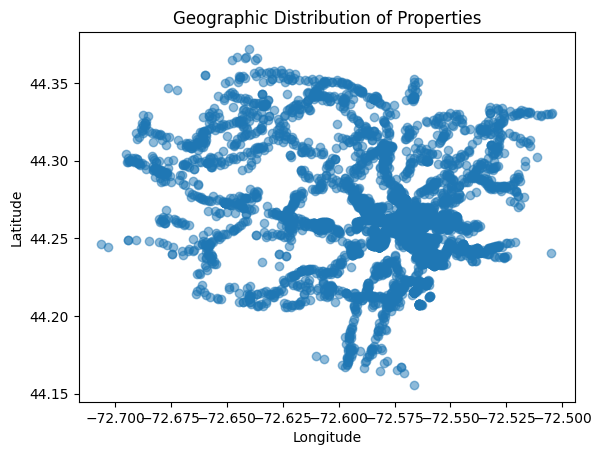

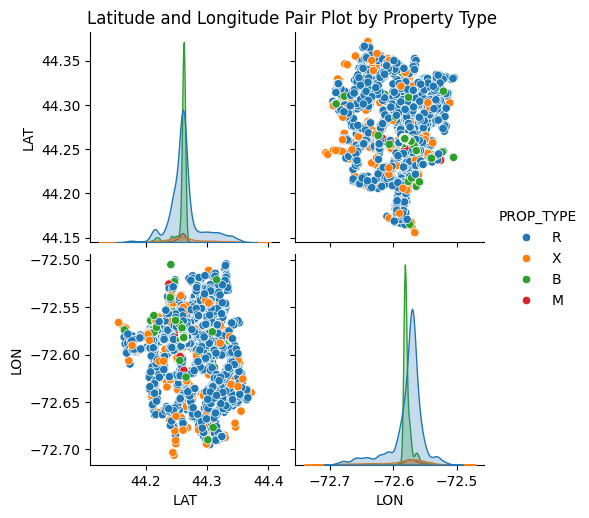

In [6]:
# Geospatial Visualization
print("\n### Geospatial Visualization ###")

# Plot Latitude and Longitude
plt.scatter(df['LON'].astype(float), df['LAT'].astype(float), alpha=0.5)
plt.title('Geographic Distribution of Properties')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Pairplot for Latitude and Longitude with Property Type
sns.pairplot(df, vars=['LAT', 'LON'], hue='PROP_TYPE', diag_kind='kde')
plt.suptitle('Latitude and Longitude Pair Plot by Property Type', y=1.02)
plt.show()

***Descriptive Statistics***


### Descriptive Statistics ###
Total number of records in the dataset: 10311
Number of Unique ZIPCODEs: 6
Frequency of Each ZIPCODE:
ZIPCODE
05602    8543
05633    1600
05609     129
05620      24
05603      14
05604       1
Name: count, dtype: int64

Number of Unique PLUS4s: 2916
Frequency of Each PLUS4:
PLUS4
0003    1397
NaN      649
0005     147
3391      29
3502      29
        ... 
8305       1
8727       1
9046       1
9531       1
2801       1
Name: count, Length: 2917, dtype: int64

Number of Unique GEOIDs: 308
Frequency of Each GEOID:
GEOID
500239546002005    1430
500239546002003     441
500239549001016     283
500239547002009     232
500239548002000     193
                   ... 
500239545001078       1
500239549001008       1
500239542002045       1
500239549001003       1
500239545001056       1
Name: count, Length: 308, dtype: int64

Number of Unique FIPSs: 1
Frequency of Each FIPS:
FIPS
50023    10311
Name: count, dtype: int64


Descriptive Statistics for Latitude and 

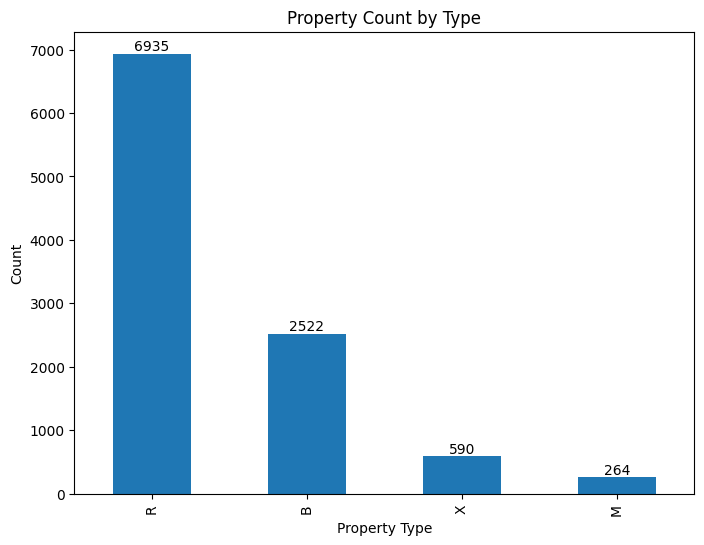

In [7]:
# Descriptive Statistics
print("\n### Descriptive Statistics ###")

total_records = len(df)
print(f"Total number of records in the dataset: {total_records}")

# Unique Counts for Categorical Columns
def print_unique_counts(column):
    if column in df.columns:
        print(f"Number of Unique {column.upper()}s: {df[column].nunique()}")
        print(f"Frequency of Each {column.upper()}:\n{df[column].value_counts(dropna=False)}\n")

print_unique_counts('ZIPCODE')
print_unique_counts('PLUS4')
print_unique_counts('GEOID')
print_unique_counts('FIPS')

# Descriptive Statistics for Latitude and Longitude
print("\nDescriptive Statistics for Latitude and Longitude:")
lat_as_float = df['LAT'].astype(float)
lon_as_float = df['LON'].astype(float)
print(pd.DataFrame({'LAT': lat_as_float, 'LON': lon_as_float}).describe())


# Property Type Distribution
if 'PROP_TYPE' in df.columns:
    # Count the occurrences of each property type
    prop_counts = df['PROP_TYPE'].value_counts()

    # Plot the bar chart
    ax = prop_counts.plot(kind='bar', title='Property Count by Type', figsize=(8, 6))
    plt.xlabel('Property Type')
    plt.ylabel('Count')

    # Add labels to the bars
    for index, value in enumerate(prop_counts):
        plt.text(index, value, str(value), ha='center', va='bottom')

    plt.show()


# Heatmap for Correlation Matrix (if multiple numerical columns)
if 'add_number' in df.columns:
    corr_matrix = pd.DataFrame({'LAT': lat_as_float, 'LON': lon_as_float, 'add_number': df['add_number'].astype(float)}).corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Heatmap of Correlations')
    plt.show()


***Data Cleaning***

In [10]:
df_cleaned = df.copy()  # Creating a copy of the original dataset
# Handle Missing Values
# Fill missing values for UNIT_DES, UNIT_NUM, and PARENT with 'Unknown'
df_cleaned = df_cleaned.fillna({'UNIT_DES': 'Unknown', 'UNIT_NUM': 'Unknown', 'PARENT': 'Unknown'})

# Fill missing PLUS4 with '0000' and ensure PLUS4 is of type string
df_cleaned['PLUS4'] = df_cleaned['PLUS4'].fillna('0000').astype(str)


*Downloading the cleaned file:*

In [11]:
# Save the cleaned DataFrame to a new CSV file
cleaned_file_path = r"Cleaned_MONTPELIER_VT.csv"
df_cleaned.to_csv(cleaned_file_path, index=False)
print(f"Data cleaning completed. Cleaned file saved at: {cleaned_file_path}")

Data cleaning completed. Cleaned file saved at: Cleaned_MONTPELIER_VT.csv


***Automated token generation***

In [13]:
import pandas as pd
import numpy as np
import requests
import json
import os


def gentoken():
    url = "https://api.cloud.precisely.com/auth/v2/token"
    payload = 'grant_type=client_credentials&scope=default'
    headers = {
        'Content-Type': 'application/x-www-form-urlencoded',
        'Authorization': os.getenv("API_AUTH_TOKEN")
    }
    
    response = requests.post(url, headers=headers, data=payload)
    token = response.json().get("access_token")
    return token

# Call the function
token = gentoken()
print("Token retrieved successfully.")

Token retrieved successfully.


****Geoaddressing: Using Precisely's Geocode API****

In [ ]:
import requests
import pandas as pd
import time
#!pip install tqdm  # This line is commented out because installation is assumed to be done
from tqdm import tqdm

# Load the cleaned dataset
file_path = r"Cleaned_MONTPELIER_VT.csv"
df = pd.read_csv(file_path, dtype={'ZIPCODE': str, 'PLUS4' : str, 'FIPS' : str})

# This line specifies the data types for specific columns. 
# 'ZIPCODE', 'PLUS4', and 'FIPS' are likely string values and are converted accordingly.

# Function to Geocode an Address
def geocode_address(address, token):
  url = "https://api.cloud.precisely.com/v1/geocode"  # Replace `{host}` with the actual API hostname
  headers = {
      'Authorization': f'Bearer {token}',
      'Content-Type': 'application/json'
  }
  data = {
      "address": address,
      "options": {
          "maxResults": 1
      }
  }
  response = requests.post(url, headers=headers, json=data)

  if response.status_code == 200:
      results = response.json()
      if results['responses'][0]['status'] == "OK":
          formatted_address = results['responses'][0]['results'][0]['address']['formattedAddress']
          lat = results['responses'][0]['results'][0]['address'].get('latitude', None)
          lon = results['responses'][0]['results'][0]['address'].get('longitude', None)
          return formatted_address, lat, lon
  return None, None, None

# Bearer token for API access (replace with your actual token)
auth_token = "YOUR_ACTUAL_TOKEN"  # Replace with your actual API token

# Splitting data into batches of 5000 rows each
batch_size = 5000
total_batches = (len(df) // batch_size) + (1 if len(df) % batch_size != 0 else 0)

# Processing each batch
for batch_num in range(total_batches):
    start_idx = batch_num * batch_size
    end_idx = min(start_idx + batch_size, len(df))
    batch_df = df.iloc[start_idx:end_idx].copy()

    print(f"Processing batch {batch_num + 1} of {total_batches}, rows {start_idx} to {end_idx - 1}")

    # Iterate through each address in the DataFrame and update with geocoded data
    formatted_addresses = []
    lats = []
    lons = []

    # Wrap the iteration with tqdm for a progress bar
    for index, row in tqdm(batch_df.iterrows(), total=len(batch_df), desc=f"Geocoding Batch {batch_num + 1}", unit="address"):
        address = f"{row['ADD_NUMBER']} {row['STREETNAME']}, {row['CITY']}, {row['STATE']} {row['ZIPCODE']}"
        
        # Handling addresses with the same ADD_NUMBER and STREETNAME
        if batch_df[(batch_df['ADD_NUMBER'] == row['ADD_NUMBER']) & (batch_df['STREETNAME'] == row['STREETNAME'])].shape[0] > 1 and row['UNIT_NUM'] != "Unknown":
            # Add unit number if addresses are the same but have a unit number
            address = f"{row['ADD_NUMBER']} {row['STREETNAME']} UNIT {row['UNIT_NUM']}, {row['CITY']}, {row['STATE']} {row['ZIPCODE']}"

        formatted_address, lat, lon = geocode_address(address, auth_token)

        # Append results to lists
        formatted_addresses.append(formatted_address if formatted_address else address)
        lats.append(lat)
        lons.append(lon)

        # Add a delay to avoid overwhelming the API
        time.sleep(0.2)

    # Add new columns to the DataFrame
    batch_df['Formatted_Address'] = formatted_addresses
    batch_df['Geocoded_Lat'] = lats
    batch_df['Geocoded_Lon'] = lons

    # Save the batch DataFrame with the new columns to a new CSV file
    output_path = rf"C:\Users\sidus\Downloads\GeoAdressed_Mont_Batch_{batch_num + 1}.csv"
    batch_df.to_csv(output_path, index=False)
    print(f"Batch {batch_num + 1} enriched data saved to: {output_path}")

**Fetching flood risk data: Using Precisely's Flood Risk GraphQL**

In [ ]:
import pandas as pd
import requests
import pandas as pd
import time
from tqdm import tqdm
#!pip install openpyxl

# Load the enriched dataset
file_path = r"GeoAdressed_Mont.csv"
df = pd.read_csv(file_path, dtype={'ZIPCODE': str, 'PLUS4' : str, 'FIPS' : str})

# Function to run a query for flood risk
def run_flood_query(address, token):
    url = "https://api.cloud.precisely.com/data-graph/graphql"
    headers = {
        'Content-Type': 'application/json',
        'Authorization': f'Bearer {token}'
    }
    query = """
    query floodRisk($address: String!) {
      getByAddress(address: $address) {
        addresses {
          data {
            floodRisk {
              data {
                preciselyID
                floodID
                femaMapPanelIdentifier
                floodZoneMapType
                stateFIPS
                floodZoneBaseFloodElevationFeet
                floodZone
                additionalInformation
                baseFloodElevationFeet
                communityNumber
                communityStatus
                mapEffectiveDate
                letterOfMapRevisionDate
                letterOfMapRevisionCaseNumber
                floodHazardBoundaryMapInitialDate
                floodInsuranceRateMapInitialDate
                addressLocationElevationFeet
                year100FloodZoneDistanceFeet
                year500FloodZoneDistanceFeet
                elevationProfileToClosestWaterbodyFeet
                distanceToNearestWaterbodyFeet
                nameOfNearestWaterbody
              }
            }
          }
        }
      }
    }
    """
    variables = {"address": address}
    payload = {"query": query, "variables": variables}
    
    response = requests.post(url, headers=headers, json=payload)
    
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception(f"Failed to retrieve data for {address}. Error: {response.text}")


# Function to collect flood risk data in batches
def collect_flood_risk_data(df_batch, token):
    flood_risk_results = []

    for _, row in tqdm(df_batch.iterrows(), total=len(df_batch), desc="Querying Flood Risk Data", unit="address"):
        # Construct address with UNIT_NUM if it's not "Unknown"
        if row['UNIT_NUM'] != 'Unknown':
            address = f"{row['ADD_NUMBER']} {row['STREETNAME']} UNIT {row['UNIT_NUM']}, {row['CITY']}, {row['STATE']} {row['ZIPCODE']}"
        else:
            address = f"{row['ADD_NUMBER']} {row['STREETNAME']}, {row['CITY']}, {row['STATE']} {row['ZIPCODE']}"
        
        try:
            data = run_flood_query(address, token)
            addresses_data = data.get("data", {}).get("getByAddress", {}).get("addresses", {}).get("data", [])

            # Ensure 'addresses_data' is a list and iterate through it
            if isinstance(addresses_data, list):
                for address_data in addresses_data:
                    flood_risk_data = address_data.get("floodRisk", {}).get("data", [])

                    # Ensure 'flood_risk_data' is a list and iterate through it
                    if isinstance(flood_risk_data, list):
                        for flood_item in flood_risk_data:
                            parsed_data = {
                                "PreciselyID": flood_item.get("preciselyID", "N/A"),
                                "Address": address,
                                "FloodID": flood_item.get("floodID", "N/A"),
                                "FemaMapPanelIdentifier": flood_item.get("femaMapPanelIdentifier", "N/A"),
                                "FloodZoneMapType": flood_item.get("floodZoneMapType", "N/A"),
                                "StateFIPS": flood_item.get("stateFIPS", "N/A"),
                                "FloodZoneBaseFloodElevationFeet": flood_item.get("floodZoneBaseFloodElevationFeet", "N/A"),
                                "FloodZone": flood_item.get("floodZone", "N/A"),
                                "AdditionalInformation": flood_item.get("additionalInformation", "N/A"),
                                "BaseFloodElevationFeet": flood_item.get("baseFloodElevationFeet", "N/A"),
                                "CommunityNumber": flood_item.get("communityNumber", "N/A"),
                                "CommunityStatus": flood_item.get("communityStatus", "N/A"),
                                "MapEffectiveDate": flood_item.get("mapEffectiveDate", "N/A"),
                                "LetterOfMapRevisionDate": flood_item.get("letterOfMapRevisionDate", "N/A"),
                                "LetterOfMapRevisionCaseNumber": flood_item.get("letterOfMapRevisionCaseNumber", "N/A"),
                                "FloodHazardBoundaryMapInitialDate": flood_item.get("floodHazardBoundaryMapInitialDate", "N/A"),
                                "FloodInsuranceRateMapInitialDate": flood_item.get("floodInsuranceRateMapInitialDate", "N/A"),
                                "AddressLocationElevationFeet": flood_item.get("addressLocationElevationFeet", "N/A"),
                                "Year100FloodZoneDistanceFeet": flood_item.get("year100FloodZoneDistanceFeet", "N/A"),
                                "Year500FloodZoneDistanceFeet": flood_item.get("year500FloodZoneDistanceFeet", "N/A"),
                                "ElevationProfileToClosestWaterbodyFeet": flood_item.get("elevationProfileToClosestWaterbodyFeet", "N/A"),
                                "DistanceToNearestWaterbodyFeet": flood_item.get("distanceToNearestWaterbodyFeet", "N/A"),
                                "NameOfNearestWaterbody": flood_item.get("nameOfNearestWaterbody", "N/A")
                            }
                            flood_risk_results.append(parsed_data)
        except Exception as e:
            print(f"Failed to retrieve floodRisk data for {address}. Error: {e}")

    return flood_risk_results

# Process data in batches of 5000
batch_size = 5000
for start in range(0, len(df), batch_size):
    end = start + batch_size
    df_batch = df.iloc[start:end]

    # Collect flood risk data for the current batch
    flood_risk_data = collect_flood_risk_data(df_batch, token)

    # Convert list of dictionaries to DataFrame
    df_flood_risk = pd.DataFrame(flood_risk_data)

    # Save the results of the current batch to an Excel file
    output_file_path = rf"FloodRisk_Results_Batch_{start}_{end}.xlsx"
    df_flood_risk.to_excel(output_file_path, index=False)
    print(f"Flood risk data for batch {start}-{end} saved to: {output_file_path}")

In [1]:
import pandas as pd

# Load the two Excel sheets into dataframes
geoaddressed_mont = pd.read_excel("GeoAdressed_Mont.xlsm", dtype={'ZIPCODE': str, 'PLUS4' : str, 'FIPS' : str})
floodrisk_results_all = pd.read_excel("FloodRisk_Results_All.xlsx", dtype={'ZIPCODE': str, 'PLUS4' : str, 'FIPS' : str})

# Drop 'Geocoded_Lat' and 'Geocoded_Lon' from Geoaddressed_Mont
geoaddressed_mont.drop(['Geocoded_Lat', 'Geocoded_Lon'], axis=1, inplace=True)

# Rename 'PBKEY' to 'PreciselyID' in Geoaddressed_Mont
geoaddressed_mont.rename(columns={'PBKEY': 'PreciselyID'}, inplace=True)

# Merge the two dataframes on 'PreciselyID', keeping all unique columns
merged_data = pd.merge(geoaddressed_mont, floodrisk_results_all, on='PreciselyID', how='outer')

# Save or display the merged data as needed
merged_data.to_excel("Merged_Full_Dataset.xlsx", index=False)  # Saves to a new Excel file

In [2]:
# Load addresses from Excel file
df = pd.read_excel("Merged_Full_Dataset.xlsx",dtype={'ZIPCODE': str, 'PLUS4' : str, 'FIPS' : str})  # Replace with the path to your file
print(df.columns)

Index(['PreciselyID', 'ADD_NUMBER', 'STREETNAME', 'UNIT_DES', 'UNIT_NUM',
       'CITY', 'STATE', 'ZIPCODE', 'PLUS4', 'LOC_CODE', 'GEOID', 'LAT', 'LON',
       'PARENT', 'PROP_TYPE', 'FIPS', 'Address_x', 'Address_y', 'FloodID',
       'FemaMapPanelIdentifier', 'FloodZoneMapType', 'StateFIPS',
       'FloodZoneBaseFloodElevationFeet', 'FloodZone', 'AdditionalInformation',
       'BaseFloodElevationFeet', 'CommunityNumber', 'CommunityStatus',
       'MapEffectiveDate', 'LetterOfMapRevisionDate',
       'LetterOfMapRevisionCaseNumber', 'FloodHazardBoundaryMapInitialDate',
       'FloodInsuranceRateMapInitialDate', 'AddressLocationElevationFeet',
       'Year100FloodZoneDistanceFeet', 'Year500FloodZoneDistanceFeet',
       'ElevationProfileToClosestWaterbodyFeet',
       'DistanceToNearestWaterbodyFeet', 'NameOfNearestWaterbody'],
      dtype='object')


In [3]:
# Drop 'Address_y' from Merged_Full_Dataset
df.drop(['Address_y'], axis=1, inplace=True)

# Rename 'Address_x' to 'Address' in df
df.rename(columns={'Address_x': 'Address'}, inplace=True)
# Create the 'Address' column by concatenating specified columns
df['Address'] = df['ADD_NUMBER'].astype(str) + ' ' + df['STREETNAME'] + ', ' + df['CITY'] + ', ' + df['STATE'] + ' ' + df['ZIPCODE'].astype(str)

print(df.columns)
df.head(5)

Index(['PreciselyID', 'ADD_NUMBER', 'STREETNAME', 'UNIT_DES', 'UNIT_NUM',
       'CITY', 'STATE', 'ZIPCODE', 'PLUS4', 'LOC_CODE', 'GEOID', 'LAT', 'LON',
       'PARENT', 'PROP_TYPE', 'FIPS', 'Address', 'FloodID',
       'FemaMapPanelIdentifier', 'FloodZoneMapType', 'StateFIPS',
       'FloodZoneBaseFloodElevationFeet', 'FloodZone', 'AdditionalInformation',
       'BaseFloodElevationFeet', 'CommunityNumber', 'CommunityStatus',
       'MapEffectiveDate', 'LetterOfMapRevisionDate',
       'LetterOfMapRevisionCaseNumber', 'FloodHazardBoundaryMapInitialDate',
       'FloodInsuranceRateMapInitialDate', 'AddressLocationElevationFeet',
       'Year100FloodZoneDistanceFeet', 'Year500FloodZoneDistanceFeet',
       'ElevationProfileToClosestWaterbodyFeet',
       'DistanceToNearestWaterbodyFeet', 'NameOfNearestWaterbody'],
      dtype='object')


,PreciselyID,ADD_NUMBER,STREETNAME,UNIT_DES,UNIT_NUM,CITY,STATE,ZIPCODE,PLUS4,LOC_CODE,...,LetterOfMapRevisionDate,LetterOfMapRevisionCaseNumber,FloodHazardBoundaryMapInitialDate,FloodInsuranceRateMapInitialDate,AddressLocationElevationFeet,Year100FloodZoneDistanceFeet,Year500FloodZoneDistanceFeet,ElevationProfileToClosestWaterbodyFeet,DistanceToNearestWaterbodyFeet,NameOfNearestWaterbody
0,P0000N0KCH66,27,BAILEY AVE,Unknown,Unknown,MONTPELIER,VT,05602,2103,P05,...,NaN,NaN,1973-06-22,2013-03-19,610.0,936.0,907.0,"610.49626, 576.38415, 562.39238, 536.03352, 51...",1477.0,Winooski River
1,P0000N0KCH67,25,BAILEY AVE,APT,1,MONTPELIER,VT,05602,2104,P05,...,NaN,NaN,1973-06-22,2013-03-19,594.0,859.0,828.0,"594.14618, 569.9619, 556.13016, 533.27127, 518...",1397.0,Winooski River
2,P0000N0KCH68,25,BAILEY AVE,APT,2,MONTPELIER,VT,05602,2104,P05,...,NaN,NaN,1973-06-22,2013-03-19,594.0,859.0,828.0,"594.14618, 569.9619, 556.13016, 533.27127, 518...",1397.0,Winooski River
3,P0000N0KCH69,23,BAILEY AVE,Unknown,Unknown,MONTPELIER,VT,05602,2103,P05,...,NaN,NaN,1973-06-22,2013-03-19,590.0,789.0,758.0,"590.24227, 568.90134, 552.91716, 531.40797, 51...",1325.0,Winooski River
4,P0000N0KCH6A,21,BAILEY AVE,Unknown,Unknown,MONTPELIER,VT,05602,2103,P05,...,NaN,NaN,1973-06-22,2013-03-19,581.0,706.0,673.0,"581.03438, 560.25334, 537.34393, 519.16465, 51...",1240.0,Winooski River


***Fetching Property attributes data: Using precisely's propertyattributesbyaddress API***

In [ ]:
#Final:
addresses = df['Address'].dropna().unique()  # Get unique addresses, excluding any empty ones


# Define a function to flatten nested 'value' fields in the API response
def flatten_data(record):
    flat_record = {}
    for key, value in record.items():
        if isinstance(value, dict) and "value" in value:
            flat_record[key] = value["value"]  # Extract the 'value' field only
        else:
            flat_record[key] = value  # Directly add if not a nested dict
    return flat_record

# Define function to make API request for a single address
def fetch_property_attributes(address):
    url = "https://api.cloud.precisely.com/data-graph/graphql"
    headers = {
        'Content-Type': 'application/json',
        'Authorization': f'Bearer {token}'
    }
    payload = f"""{{
        "query": "query propertyAttributesByAddress {{ getByAddress(address: \\"{address}\\") {{ propertyAttributes {{ data {{ preciselyID propertyVacancy {{ value }} propertyCategory {{ value }} apn geographyID standardizedLandUseCode {{ value }} countyLandUseCode latitude longitude locationCode legalJurisdiction propertyAreaAcres propertyAreaSquareFootage  yearBuilt buildingCount buildingSquareFootage buildingSquareFootageCode {{ value }} buildingStyle {{ value }} buildingStories {{ value }} buildingUnitNumber buildingQuality {{ value }} buildingType {{ value }} mobileHome {{ value }} buildingCondition {{ value }} buildingConstruction {{ value }} exteriorWalls {{ value }} roofCover {{ value }} roofShape {{ value }} livingSquareFootage grossSquareFootage buildingArea1SquareFootage buildingArea1Code {{ value }} buildingArea2SquareFootage  buildingArea3SquareFootage  buildingArea4SquareFootage  buildingArea5SquareFootage  buildingArea6SquareFootage  buildingArea7SquareFootage  basementType {{ value }} basementSquareFootage foundationType {{ value }} floorType {{ value }} roomCount bedroomCount bathroomCount {{ value }} partialBathroomCount bathroomFixtureCount plumbingFixtureCount        coolingType{{ value }}       garageType {{ value }}        parkingAreaSquareFootage        parkingCount        pool             heatingType {{ value }}        energyType {{ value }}        fuelType {{ value }}            elevatorCount            saleAmount        saleCode {{ value }}       priorSaleDate        priorSaleDocumentCode {{ value }}       priorSaleAmount        priorSaleBookNumber        priorSalePageNumber       priorSaleDocumentNumber        taxAmount        taxYear              assessmentYear        totalAssessedValue        landAssessedValue       improvementAssessedValue        marketValueYear        totalMarketValue       landMarketValue        improvementMarketValue        totalAppraisedValue        landAppraisedValue        improvementAppraisedValue }} }} }} }}"
    }}"""
    
    response = requests.post(url, headers=headers, data=payload)
    
    if response.status_code == 200:
        try:
            data = response.json()
            # Check for errors or missing data
            if "errors" in data or not data.get("data", {}).get("getByAddress", {}).get("propertyAttributes"):
                raise ValueError(f"No data found for address: {address}")
            property_data = data["data"]["getByAddress"]["propertyAttributes"]["data"]
            return [flatten_data(item) for item in property_data]  # Flatten each record in the data list
        except Exception as e:
            print(f"Error processing address {address}: {e}")
            return None
    else:
        print(f"Failed to retrieve data for address {address}. HTTP Status: {response.status_code}")
        return None

# Process data in batches of 5000 (here, using a smaller batch_size for testing)
batch_size = 5000
num_batches = (len(addresses) + batch_size - 1) // batch_size  # Ceiling division for total batches

for batch_num in range(num_batches):
    start_index = batch_num * batch_size
    end_index = min(start_index + batch_size, len(addresses))
    batch_addresses = addresses[start_index:end_index]
    
    results = []
    
    print(f"Processing batch {batch_num + 1}/{num_batches}...")

    for address in batch_addresses:
        property_data = fetch_property_attributes(address)
        if property_data:
            for item in property_data:
                item['Address'] = address  # Add address to each result for reference
                results.append(item)
        time.sleep(0.2)  # Slight delay to avoid overloading the server

    # Convert results to DataFrame and save to Excel file
    batch_df = pd.DataFrame(results)
    batch_filename = f"Property_Attributes_Batch_{batch_num + 1}.xlsx"
    batch_df.to_excel(batch_filename, index=False)
    print(f"Batch {batch_num + 1} saved to {batch_filename}")

**Merging Flood risk data with property attributes:**

In [ ]:
property_attributes = pd.read_excel("Property_Attributes_All.xlsx")
floodrisk_results_all = pd.read_excel("FloodRisk_Results_All.xlsx", dtype={'ZIPCODE': str, 'PLUS4' : str, 'FIPS' : str})

print(floodrisk_results_all.columns)
print(property_attributes.columns)
floodrisk_results_all.rename(columns={'PreciselyID': 'preciselyID'}, inplace=True)
print(floodrisk_results_all.columns)

In [ ]:
# Merge the two dataframes on 'PreciselyID', keeping all unique columns
merged_data = pd.merge(property_attributes, floodrisk_results_all, on='preciselyID', how='inner')

# Save or display the merged data as needed
merged_data.to_excel("Flood risk with prop attributes_Dataset.xlsx", index=False)

**Columns with no data:**

In [ ]:
file_path = "Flood risk with prop attributes_Dataset.xlsx"
df = pd.read_excel(file_path)

# Identify columns with no data (all values are NaN)
empty_columns = df.columns[df.isna().all()].tolist()

# Display the list of empty columns
print("Columns with no data:", empty_columns)

In [ ]:
# Drop the empty columns
df = df.drop(columns=empty_columns)

# Save the updated DataFrame back to Excel
output_path = "Updated_Flood_risk_with_prop_attributes_Dataset.xlsx"  # Output file path
df.to_excel(output_path, index=False)

print(f"Updated file saved as {output_path}")

*Inspecting the data:*

In [16]:
file_path = "Updated_Flood_risk_with_prop_attributes_Dataset.xlsx"
df = pd.read_excel(file_path, dtype={'yearBuilt': str, 'PLUS4' : str, 'StateFIPS': str})

In [ ]:
df.info()

In [ ]:
# Drop columns with more than 90% missing values
threshold = 0.3 * len(df)
df = df.dropna(thresh=threshold, axis=1)

columns_to_drop = ['apn', 'geographyID', 'garageType', 'basementSquareFootage', 'priorSaleDate', 'standardizedLandUseCode', 'taxYear', 'assessmentYear', 'priorSaleDocumentCode', 'priorSaleAmount', 'priorSaleDocumentNumber', 'locationCode', 'FloodZoneMapType', 'MapEffectiveDate', 'Address_x', 'Address_y', 'buildingCount', 'buildingSquareFootageCode', 'buildingSquareFootage', 'buildingUnitNumber', 'buildingArea1SquareFootage', 'buildingArea1Code','buildingArea2SquareFootage', 'buildingArea3SquareFootage', 'buildingArea4SquareFootage', 'buildingArea5SquareFootage', 'buildingArea6SquareFootage', 'buildingArea7SquareFootage']

# Drop the columns and update the DataFrame
df = df.drop(columns=columns_to_drop)

df.info()

In [ ]:
# List of columns you want to change to object type
columns_to_update = ['FloodID', 'CommunityNumber']

# Update the data type of the specified columns to object
df[columns_to_update] = df[columns_to_update].astype('object')

print(data['FloodID'])
df.info()

In [ ]:
# Fill numerical columns with their median
data = df.fillna(df.select_dtypes(include='number').median())

# Fill missing values in object-type columns with a common value, e.g., "Unknown"
data = df.apply(lambda col: col.fillna("Unknown") if col.dtype == 'object' else col)

# Fill missing values in float64 columns with their median
data = df.fillna(df.select_dtypes(include='float64').median())

In [ ]:
print(data['yearBuilt'])
print(data.columns)
data.to_excel('Clustering Dataset_FINAL.xlsx', index=False)

***Solution 1: Clustering-based risk assessment: Defining tiers***

Goal: Group properties based on similar risk profiles, allowing insurers to:
1) Identify clusters of high, medium, and low-risk properties. 
2) Understand patterns in risk profiles and make informed decisions in underwriting and risk management

In [ ]:
import pandas as pd

file_path = "Clustering Dataset_FINAL.xlsx"
df = pd.read_excel(file_path)

df.info()

In [ ]:
#exteriorWalls
exteriorWalls = df['exteriorWalls'].nunique()
print(f"Number of unique exteriorWalls entries: {exteriorWalls}")

#exteriorWalls:unique values
exteriorWalls_unique = df['exteriorWalls'].unique()[:10]
print("Examples of unique exteriorWalls entries:")
print(exteriorWalls_unique)

#roofCover
roofCover = df['roofCover'].nunique()
print(f"Number of unique roofCover entries: {roofCover}")

#roofCover:unique values
roofCover_unique = df['roofCover'].unique()[:10]
print("Examples of unique roofCover entries:")
print(roofCover_unique)

#buildingConstruction
unique_count = df['buildingConstruction'].nunique()
print(f"Number of unique buildingConstruction entries: {unique_count}")

#roofCover:unique values
unique_examples = df['buildingConstruction'].unique()[:10]
print("Examples of unique buildingConstruction entries:")
print(unique_examples)

In [ ]:
#Distance related variables:

# List of columns to check
columns_to_check = ['Year100FloodZoneDistanceFeet', 'DistanceToNearestWaterbodyFeet', 'AddressLocationElevationFeet']

# Check if any of the values are negative in each column
for column in columns_to_check:
    negative_values = df[df[column] < 0]
    if not negative_values.empty:
        print(f"Negative values found in {column}:")
        print(negative_values[[column]].head())  # Display a sample of the rows with negative values
    else:
        print(f"No negative values found in {column}.")
        
# Creating a combined distance variable
df['DistanceFactor'] = df['Year100FloodZoneDistanceFeet'] + df['DistanceToNearestWaterbodyFeet'] + df['AddressLocationElevationFeet']

df['DistanceFactor'].head()

In [ ]:
#Dropping preciselyID variable:
data_transformed = df.drop(columns=['preciselyID','StateFIPS','FloodID', 'FloodInsuranceRateMapInitialDate', 'FemaMapPanelIdentifier' ])

# Encoding categorical variables
data_encoded = pd.get_dummies(data_transformed, drop_first=False)
print(data_encoded.columns)

column_count = len(data_encoded.columns)
print("Number of columns in data_encoded:", column_count)

# Filter columns that start with 'FloodZone_'
floodzone_columns = [col for col in data_encoded.columns if col.startswith("FloodZone_")]
print("Columns that start with 'FloodZone_':", floodzone_columns)


#buildingConstruction
BuildingConstruction_columns = [col for col in data_encoded.columns if col.startswith("buildingConstruction")]
print("Columns that start with 'FloodZone_':", BuildingConstruction_columns)


#mobileHome
MobileHome = [col for col in data_encoded.columns if col.startswith("mobileHome")]
print("Columns that start with 'FloodZone_':", MobileHome)

**Feature Selection** using unsupervised feature selection techniques:

*1) Principal Component Analysis (PCA)*

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# Apply PCA to understand feature contributions
pca = PCA(n_components=20)  # Choose enough components to explain most variance
pca.fit(data_encoded)

# Retrieve feature importance by examining the components
feature_importance = np.abs(pca.components_).mean(axis=0)
feature_importance_series = pd.Series(feature_importance, index=data_encoded.columns)
top_features_pca = feature_importance_series.nlargest(20)

print("Top features based on PCA:", top_features_pca)

*2) Feature Variance Analysis*

In [ ]:
# Calculate variance for each feature
variance = data_encoded.var()
top_features_variance = variance.nlargest(20)

print("Top features based on variance:", top_features_variance)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the specified columns for correlation analysis
selected_columns = [
    'bedroomCount', 'NameOfNearestWaterbody_Winooski River',
    'DistanceToNearestWaterbodyFeet', 'improvementAssessedValue', 'totalAssessedValue',
    'roomCount', 'bathroomCount', 'grossSquareFootage', 'landAssessedValue', 'taxAmount', 'saleAmount',
    'livingSquareFootage', 'Year100FloodZoneDistanceFeet', 'DistanceFactor',
    'totalMarketValue', 'propertyAreaSquareFootage', 'FloodZone_X', 'FloodZone_AE', 'FloodZone_SHX']
data_selected = data_encoded[selected_columns]

# Calculate the correlation matrix
correlation_matrix = data_selected.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation Matrix of Selected Features")
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the specified columns for correlation analysis
selected_columns = ['NameOfNearestWaterbody_Winooski River', 'FloodZone_AE', 'buildingConstruction_FRM','FloodZone_SHX', 'exteriorWalls_WOS', 'DistanceFactor', 'totalMarketValue' 
]
data_selected = data_encoded[selected_columns]

# Rename mapping for business-friendly labels
rename_mapping = {
    'NameOfNearestWaterbody_Winooski River': 'Nearest Waterbody (Winooski River)',
    'FloodZone_AE': 'Flood Zone (AE)',
    'buildingConstruction_FRM': 'Building Construction Type (Frame)',
    'FloodZone_SHX': 'Flood Zone (SHX)',
    'exteriorWalls_WOS': 'Exterior Walls (Wood Siding)',
    'DistanceFactor': 'Distance Factor',
    'totalMarketValue': 'Total Market Value'
}

# Calculate the correlation matrix
correlation_matrix = data_selected.corr()

# Rename columns and rows in the correlation matrix for business-friendly labels
correlation_matrix.rename(columns=rename_mapping, index=rename_mapping, inplace=True)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation Matrix of Selected Features")
plt.show()

#'totalAssessedValue','buildingCondition_V', 'propertyAreaSquareFootage', 'totalMarketValue', ,'mobileHome_Y', FloodZone_AE

*Data Standarization*

Clustering with diverse set of variables:
Distance-related features (Distance Factor: 'Year100FloodZoneDistanceFeet','DistanceToNearestWaterbodyFeet',‘AddressLocationElevationFeet')
Property characteristics and value (e.g., Building Construction Type, Exterior Walls, Total Market Value, Living Square Footage)
Geographic risk factors (e.g., flood zone proximity, waterbody distance).

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_encoded[selected_columns])

In [ ]:
#Determining number of clusters for our dataset:
#The Elbow Method:
from sklearn.cluster import KMeans
inertia = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_normalized)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method graph
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Apply K-Means clustering with k = 5
k = 5
kmeans = KMeans(n_clusters=k, random_state=0)
data_encoded['Cluster'] = kmeans.fit_predict(data_normalized)  # Add cluster labels to the DataFrame

In [ ]:
# Calculate the mean of each feature within each cluster
cluster_summary = data_encoded.groupby('Cluster')[selected_columns].mean()
print(cluster_summary)

In [ ]:
# Define the OverallRiskLevel levels for clusters:
# Assign risk levels based on cluster labels
risk_mapping = {3: 'High Risk',
    4: 'Moderate-High Risk',
    2: 'Moderate Risk',
    1: 'Low-Moderate Risk',
    0: 'Low Risk'}
cluster_summary['OverallRiskLevel'] = cluster_summary.index.map(risk_mapping)

# Display the cluster summary with risk levels
print(cluster_summary)

In [ ]:
# Retrieve 'preciselyID' and add it back to `data_encoded` for final mapping
data_encoded['preciselyID'] = df['preciselyID']
data_encoded['latitude'] = df['latitude']
data_encoded['longitude'] = df['longitude']
# Map risk levels to the original data for each property based on clusters
risk_level_mapping = cluster_summary['OverallRiskLevel'].to_dict()
data_encoded['OverallRiskLevel'] = data_encoded['Cluster'].map(risk_level_mapping)

# Display a sample of the data with assigned risk levels and 'preciselyID'
print(data_encoded[['preciselyID', 'Cluster', 'OverallRiskLevel','latitude', 'longitude']].head(10))

# Calculate the number of records in each cluster and print the cluster summary with counts and risk levels
cluster_counts = data_encoded['Cluster'].value_counts().sort_index()
for cluster, risk_level in risk_mapping.items():
    print(f"Cluster: {cluster}, Risk Level: {risk_level}, Number of Records: {cluster_counts[cluster]}")

In [ ]:
# Export the final data with preciselyID, Cluster, and Risk_Level to an Excel file
output_file_path = "Clustered_Data_with_Risk_Levels.xlsx"
data_encoded[['preciselyID', 'Cluster','OverallRiskLevel','latitude', 'longitude']].to_excel(output_file_path, index=False)

print(f"Output saved to {output_file_path}")


*****Solution 2: Underinsurance Identification*****

In [4]:
import pandas as pd

# Load your dataset
data = pd.read_excel("VT_PIF.xlsx", dtype={'PolicyNo': str, 'Construction_Class' : str, 'CountyFIPS' : str, 'PROP_YRBLD': str})

# Count the number of rows with missing data for each critical column
missing_data = data[['PolicyValue', 'PROP_ASSED_VAL']].isnull().sum()
print("Number of Missing Values in Key Columns:\n", missing_data)

Number of Missing Values in Key Columns:
 PolicyValue       0
PROP_ASSED_VAL    0
dtype: int64


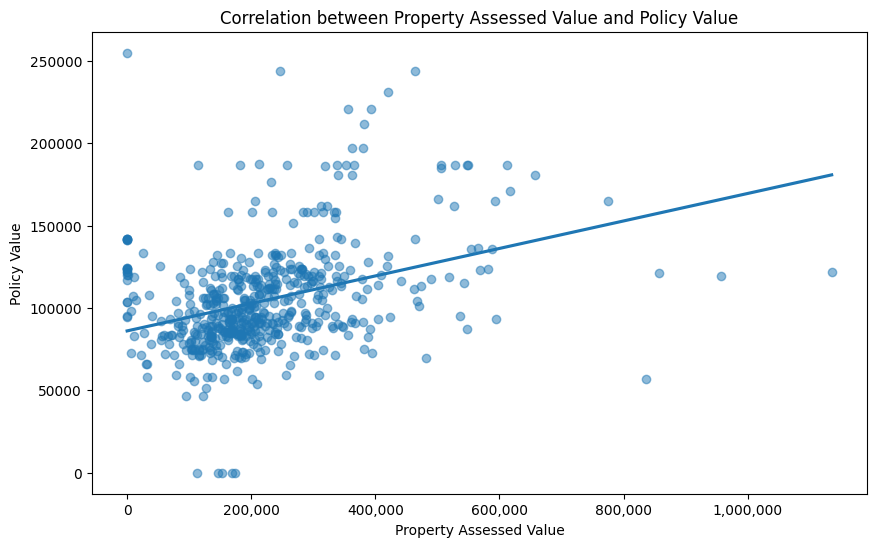

In [5]:
# Plotting the correlation using seaborn's regplot
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Removing the confidence interval with ci=None
sns.regplot(x='PROP_ASSED_VAL', y='PolicyValue', data=data, scatter_kws={'alpha': 0.5}, ci=None)

plt.title('Correlation between Property Assessed Value and Policy Value')
plt.xlabel('Property Assessed Value')
plt.ylabel('Policy Value')

# Format the x-axis to use commas for thousands separators
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()


In [6]:
#Insurance-to-Value (ITV) Ratio
data['ITV_Ratio'] = data['PolicyValue'] / data['PROP_ASSED_VAL']

In [7]:
#Underinsurance threshold
underinsurance_threshold = 0.8
data['Underinsured'] = data['ITV_Ratio'] < underinsurance_threshold

In [8]:
# Convert Underinsured to binary (1 for underinsured, 0 for sufficiently insured)
data['Underinsured'] = data['Underinsured'].astype(int)

In [9]:
# Count the number of underinsured properties
underinsured_count = data['Underinsured'].sum()
print("Number of Underinsured Properties:", underinsured_count)

Number of Underinsured Properties: 465


In [13]:
# Filter to get only underinsured properties
underinsured_properties = data[data['Underinsured'] == 1]

# Calculate underinsured amount for each underinsured property
data['Underinsured_Amount'] = data.apply(
    lambda row: row['PROP_ASSED_VAL'] - row['PolicyValue'] if row['Underinsured'] == 1 else 0,
    axis=1
)

In [14]:
average_underinsurance = underinsured_properties['Underinsured_Amount'].mean()


# Select the relevant columns and display a sample (e.g., first 10 underinsured properties)
print(underinsured_properties[['pbKey', 'Underinsured', 'ITV_Ratio','PolicyValue', 'PROP_ASSED_VAL','Underinsured_Amount']].head(10))


           pbKey  Underinsured  ITV_Ratio  PolicyValue  PROP_ASSED_VAL  \
0   P0000N0KC9IL             1   0.254482        88636          348300   
1   P0000N0KBFJ9             1   0.501724       158294          315500   
2   P0000N0KDQRH             1   0.658127       123333          187400   
3   P0000N0KD9K4             1   0.687445       106279          154600   
5   P0000N0KB0TZ             1   0.520704        87999          169000   
7   P0000N0KD3H1             1   0.694179       119607          172300   
8   P0000N0KCPP8             1   0.622971       111138          178400   
9   P0000N0KBX25             1   0.367063       125499          341900   
10  P0000N0KBUBS             1   0.297684        91776          308300   
11  P0000N0KB95A             1   0.283061        57065          201600   

    Underinsured_Amount  
0                259664  
1                157206  
2                 64067  
3                 48321  
5                 81001  
7                 52693  
8  

In [15]:
print("Average underinsurance amount for underinsured properties:", average_underinsurance)

Average underinsurance amount for underinsured properties: 146609.35698924732


****Automated report for underinsured properties:****

In [53]:
# Create an automated report for underinsured properties

# Filepath for the report
output_file = "Automated_Underinsured_Properties_Report.xlsx"

# Generate the report by saving the underinsured properties to an Excel file
def generate_report(underinsured_properties, output_file):
    """
    Save the report of underinsured properties to an Excel file.
    """
    try:
        # Select relevant columns for the report
        report_columns = [
            'pbKey', 'PolicyNo','PolicyValue', 'PROP_ASSED_VAL', 
            'ITV_Ratio', 'Latitude', 'Longitude', 'Underinsured_Amount'
        ]
        
        # Filter the DataFrame to include only the specified columns
        filtered_properties = underinsured_properties[report_columns]
        
        # Save the filtered DataFrame to an Excel file
        filtered_properties.to_excel(output_file, index=False)
        
        print(f"Report generated successfully: {output_file}")
    except KeyError as e:
        print(f"One or more columns are missing in the input data: {e}")
    except Exception as e:
        print(f"Error generating report: {e}")

# Call the report generation function
generate_report(underinsured_properties, output_file)

# Summary statistics for the report
summary_stats = {
    "Total Properties": len(data),
    "Underinsured Properties": underinsured_count,
    "Average Underinsurance Amount": average_underinsurance
}

# Print the summary statistics
print("\nAutomated Report Summary:")
for key, value in summary_stats.items():
    print(f"{key}: {value}")

Report generated successfully: Automated_Underinsured_Properties_Report.xlsx

Automated Report Summary:
Total Properties: 555
Underinsured Properties: 465
Average Underinsurance Amount: 146609.35698924732
